In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import scipy
from scipy.stats import t
from scipy import stats

In [8]:
df = pd.read_excel("data/shansep plot.xlsx")
e_df = pd.read_excel("data/all_su.xlsx")
e_df

,Unnamed: 0,raw PointID,Depth,Su,Test,PointID,Index,σv (kPa),σ'v (kPa),Su/σ'v,PI,PI Δ,PI Δ index,FC,FC Δ,FC Δ index,OCR
0,0,544WTG23-BH01,9.89,150.0,LPEN,544WTG23-BH01,3,654.128685,140.706685,1.066047,4,0.19,0,37.1,0.19,0,0.0
1,1,544WTG23-BH01,9.90,150.0,LPEN,544WTG23-BH01,3,654.326400,140.806400,1.065292,4,0.2,0,37.1,0.20,0,0.0
2,2,544WTG23-BH01,10.30,100.0,LPEN,544WTG23-BH01,3,662.235000,144.795000,0.690632,21,0.2,0,70.1,0.20,0,0.0
3,3,544WTG23-BH01,10.31,100.0,LPEN,544WTG23-BH01,3,662.432715,144.894715,0.690156,21,0.19,0,70.1,0.19,0,0.0
4,4,544WTG23-BH01,10.50,100.0,LPEN,544WTG23-BH01,3,666.189300,146.789300,0.681249,21,0,0,70.1,0.00,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,603,544WTG23-BH01,3.70,29.0,DSS,544WTG23-BH01,2,486.501400,33.741400,0.859478,4,6.0,1,11.1,0.00,0,0.0
604,604,544WTG23-BH03a,18.50,32.0,DSS,544WTG23-BH03,5,801.335241,203.535241,0.157221,error,error,error,5.4,11.50,-3,NaN
605,605,544WTG23-BH05,2.00,6.0,DSS,544WTG23-BH05,2,456.288000,20.188000,0.297206,6,0,0,61.8,0.00,0,0.0
606,606,544WTG23-BH06,14.00,40.0,DSS,544WTG23-BH06,2,693.592822,139.892822,0.285933,6,8.5,1,5.0,0.00,0,0.0


## Nkt plots

In [9]:
ax = sns.scatterplot(data=df, x=

SyntaxError: incomplete input (2732809637.py, line 1)

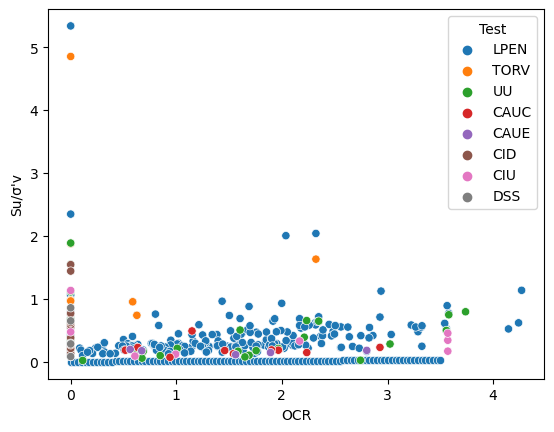

In [10]:
# y = S * x^m
linex = np.linspace(0, 3.5, num=100)
liney = 0.012*(linex**(0.67))
#liney = -1.91 + linex*0.67

ax = sns.scatterplot(x=linex, y=liney)
ax = sns.scatterplot(data=e_df, y="Su/σ'v", x="OCR", hue="Test")
#plt.xscale("log")
#plt.yscale("log")

In [5]:
# y = S * x^m
linex = np.linspace(-2, , num=100)
liney = -1.91 + linex*0.67

ax = sns.scatterplot(x=linex, y=liney)
ax = sns.scatterplot(data=df, y="Su/σ'v log", x="OCR log", hue="Test")

SyntaxError: invalid syntax (3566716419.py, line 2)

In [ ]:
ax = sns.scatterplot(x=linex, y=liney)
ax = sns.scatterplot(data=df, y="Su/σ'v", x="OCR", hue="PI")

In [ ]:
ax = sns.scatterplot(x=linex, y=liney)
ax = sns.scatterplot(data=df, y="Su/σ'v", x="OCR", hue="FC")

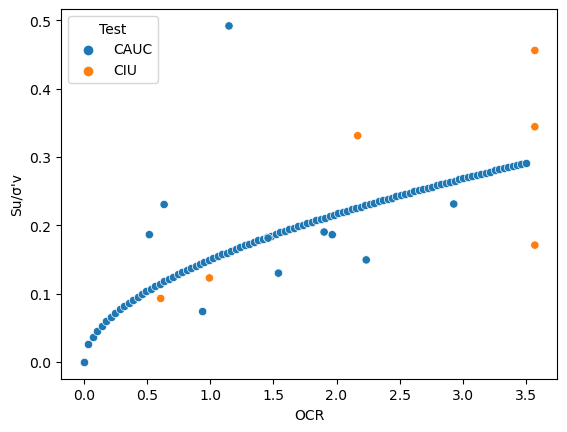

In [24]:
linex = np.linspace(0, 3.5, num=100)
liney = 0.15*linex**(0.53)
plot_df = df[df["Test"] != "UU"]

ax = sns.scatterplot(x=linex, y=liney)
ax = sns.scatterplot(data=plot_df, y="Su/σ'v", x="OCR", hue="Test")

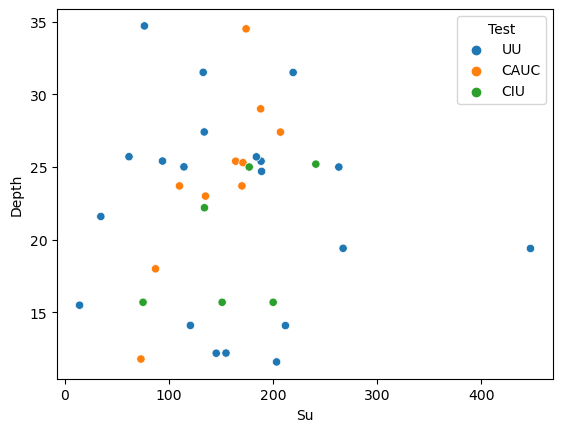

In [22]:
ax = sns.scatterplot(data=df, x="Su", y="Depth", hue="Test")

# Calculate OCR based on the layer

In [11]:
ocr_df = pd.read_excel("data/Vineyard OCR.xlsx")
ocr_df

,Unnamed: 0,raw PointID,PointID,Depth,In situ vertical effective stress,In situ vertical total stress,σ'v0 [kPa],Cc,Cr,OCR,Index
0,0,544WTG23-BH08,544WTG23-BH08,8.00,85.000,595,76.000,0.526,0.069,2.701176,3
1,1,544WTG23-BH11,544WTG23-BH11,9.80,90.000,645,93.100,0.573,0.149,6.978912,3
2,2,544WTG23-BH02,544WTG23-BH02,11.00,110.000,615,104.500,0.372,0.100,1.706727,2
3,3,544WTG23-BH03a,544WTG23-BH03,11.00,95.000,650,104.500,0.424,0.078,8.044105,4
4,4,544WTG23-BH01A,544WTG23-BH01,11.60,110.000,645,110.200,0.388,0.066,4.562309,4
5,5,544WTG23-BH04,544WTG23-BH04,15.70,145.000,750,149.150,0.319,0.053,6.411215,4
6,6,544WTG23-BH10a,544WTG23-BH10,19.10,175.000,795,181.450,0.340,0.047,3.925515,7
7,7,544WTG23-BH02,544WTG23-BH02,20.60,195.700,810,195.700,0.466,0.133,4.581656,5
8,8,544WTG23-BH06,544WTG23-BH06,21.50,205.000,860,204.250,0.306,0.063,1.844537,2
9,9,544WTG23-BH11a,544WTG23-BH11,21.90,195.000,885,208.050,0.615,0.166,4.243017,6


In [12]:
def find_ocr(bh, layer):
    ocr_filter = ocr_df[(ocr_df["PointID"] == bh) & (ocr_df["Index"] == layer)]
    try:
        return ocr_filter["OCR"].mean()
    except:
        return "Error"
    
df["OCR layer"] = df.apply(lambda x: find_ocr(x.PointID, x.Index), axis=1)
df

,raw PointID,Depth,Su,Test,PointID,Index,σv (kPa),σ'v (kPa),Su/σ'v,PI,PI Δ,PI Δ index,FC,FC Δ,FC Δ index,OCR,OCR log,Su/σ'v log,OCR layer
0,544WTG23-BH01a,11.60,203.30,UU,544WTG23-BH01,4,844.000500,313.820500,0.647823,13,0.20,0,30.4,0.20,0,2.347996,0.853562,-0.434138,4.562309
1,544WTG23-BH01a,24.70,188.90,UU,544WTG23-BH01,6,1533.169225,874.609225,0.215982,25,0.70,0,53.8,0.70,0,1.008936,0.008896,-1.532559,4.665347
2,544WTG23-BH01a,25.40,188.40,UU,544WTG23-BH01,6,1546.145774,880.725774,0.213914,25,0.00,0,53.8,0.00,0,1.966202,0.676104,-1.542179,4.665347
3,544WTG23-BH01a,25.41,93.70,UU,544WTG23-BH01,6,1546.331153,880.813153,0.106379,25,0.01,0,53.8,0.01,0,1.689093,0.524192,-2.240747,4.665347
4,544WTG23-BH01a,34.70,76.33,UU,544WTG23-BH01,6,1718.548495,961.988495,0.079346,14,0.50,0,74.8,0.50,0,1.649788,0.500647,-2.533936,4.665347
5,544WTG23-BH02,12.20,145.30,UU,544WTG23-BH02,3,730.066267,194.006267,0.748945,16,2.20,2,50.2,0.80,1,3.579901,1.275335,-0.289090,NaN
6,544WTG23-BH02,12.21,154.70,UU,544WTG23-BH02,3,730.251174,194.093174,0.797040,16,2.19,2,50.2,0.79,1,3.738717,1.318743,-0.226851,NaN
7,544WTG23-BH02,19.40,447.20,UU,544WTG23-BH02,5,1287.360452,680.740452,0.656932,17,1.20,0,92.8,2.60,0,2.234374,0.803961,-0.420175,4.125019
8,544WTG23-BH02,19.41,267.20,UU,544WTG23-BH02,5,1287.539501,680.821501,0.392467,17,1.19,0,92.8,2.59,0,2.211469,0.793657,-0.935303,4.125019
9,544WTG23-BH02,27.41,133.80,UU,544WTG23-BH02,5,1430.778433,745.660433,0.179438,24,0.21,0,92.8,5.41,0,1.755640,0.562833,-1.717924,4.125019


In [13]:
#df.to_excel("ocr_layer.xlsx")

In [35]:
plot_df

,raw PointID,Depth,Su,Test,PointID,Index,σv (kPa),σ'v (kPa),Su/σ'v,PI,PI Δ,PI Δ index,FC,FC Δ,FC Δ index,OCR,OCR log,Su/σ'v log,OCR layer
20,544WTG23-BH01a,11.8,73.0,CAUC,544WTG23-BH01,4,847.928340,315.788340,0.231167,13,0.4,0,28.7,0.4,0,2.928299,1.074422,-1.464613,4.562309
21,544WTG23-BH01a,25.4,164.0,CAUC,544WTG23-BH01,6,1546.145774,880.725774,0.186210,25,0.0,0,53.8,0.0,0,1.966202,0.676104,-1.680880,4.665347
22,544WTG23-BH01a,27.4,207.0,CAUC,544WTG23-BH01,6,1583.221628,898.201628,0.230461,11,0.2,0,68.6,0.2,0,0.634990,-0.454146,-1.467676,4.665347
23,544WTG23-BH01a,34.5,174.0,CAUC,544WTG23-BH01,6,1714.840910,960.240910,0.181205,14,0.3,0,74.8,0.3,0,1.458194,0.377199,-1.708129,4.665347
24,544WTG23-BH02,18.0,87.0,CAUC,544WTG23-BH02,5,1262.293639,669.393639,0.129968,17,2.6,0,86.7,3.0,0,1.540159,0.431886,-2.040464,4.125019
25,544WTG23-BH02,23.0,135.0,CAUC,544WTG23-BH02,5,1351.817972,709.917972,0.190163,44,0.0,0,92.8,1.0,0,1.901840,0.642822,-1.659875,4.125019
26,544WTG23-BH02,25.2,241.0,CIU,544WTG23-BH02,5,1391.208678,727.748678,0.331158,21,0.0,0,92.8,3.2,0,2.167620,0.773630,-1.105159,4.125019
27,544WTG23-BH02,29.0,188.0,CAUC,544WTG23-BH02,6,1709.620774,1008.920774,0.186338,9,0.0,0,38.5,0.6,0,0.518019,-0.657743,-1.680195,1.612057
28,544WTG23-BH04,15.7,75.0,CIU,544WTG23-BH04,4,1008.977511,438.617511,0.170992,12,1.0,0,77.4,1.0,0,3.570581,1.272728,-1.766140,6.411215
29,544WTG23-BH04,15.7,151.0,CIU,544WTG23-BH04,4,1008.977511,438.617511,0.344264,12,1.0,0,77.4,1.0,0,3.570581,1.272728,-1.066348,6.411215


S = 0.16982436524617442, m = 0.36


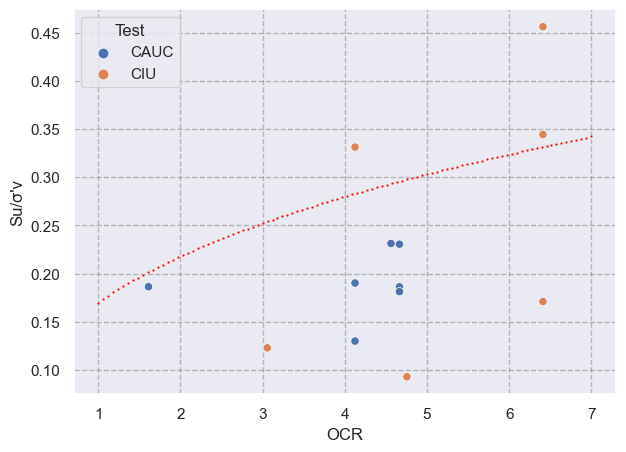

In [34]:
# y = S * x^m
S = 10**(-0.77)
m = 0.36
#S = 0.1
#m = 0.4
print(f"S = {S}, m = {m}")
linex = np.linspace(1, 7, num=100)
liney = S*(linex**(m))
#liney = -1.91 + linex*0.67

sns.set(rc={"figure.figsize":(7, 5)})
plot_df = df[df["Test"] != "UU"]
ax = sns.scatterplot(x=linex, y=liney, c="red", s=3)
ax = sns.scatterplot(data=plot_df, y="Su/σ'v", x="OCR layer", hue="Test")
#ax.set_ylim(0, 1)
ax.set_xlabel("OCR")
plt.grid(True, linestyle="--", color="gray", alpha=0.5)
#plt.xscale("log")
#plt.yscale("log")

In [15]:
df["PI"].describe()

count    36.000000
mean     19.361111
std       8.989368
min       8.000000
25%      12.750000
50%      16.500000
75%      25.000000
max      44.000000
Name: PI, dtype: float64

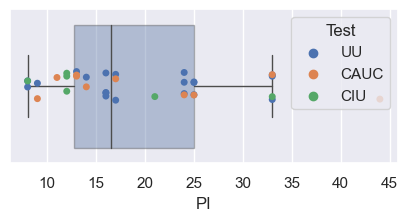

In [16]:
plot_df, param = df, "PI"
ax = sns.set(rc={"figure.figsize":(5, 2)})
ax = sns.boxplot(data=plot_df, x=param, boxprops=dict(alpha=.4), linewidth=1, showfliers= False)
ax = sns.stripplot(data=plot_df, x=param, orient="h", hue="Test")

(0.0, 1.4)

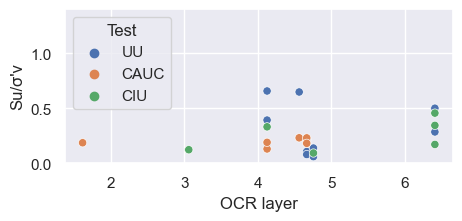

In [17]:
# y = S * x^m
linex = np.linspace(0, 3.5, num=100)
liney = 0.012*(linex**(0.67))
#liney = -1.91 + linex*0.67

#ax = sns.scatterplot(x=linex, y=liney)
ax = sns.scatterplot(data=df, y="Su/σ'v", x="OCR layer", hue="Test")
ax.set_ylim(0, 1.4)
#plt.xscale("log")
#plt.yscale("log")

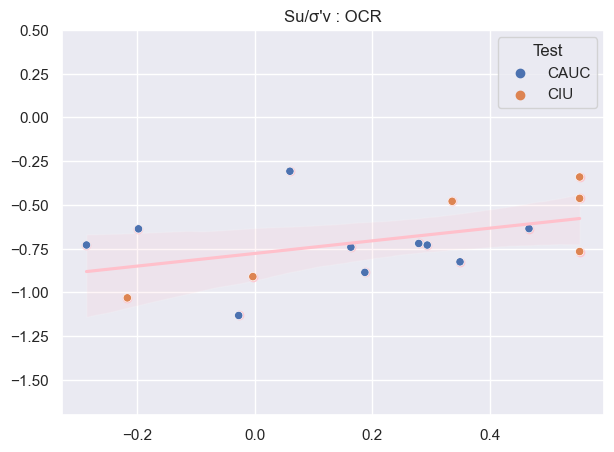

In [26]:
f, ax = plt.subplots(figsize=(7, 5))
su_array = np.array(plot_df["Su/σ'v"])
ocr_array = np.array(plot_df["OCR"])

ax = sns.regplot(y=np.log10(su_array), x=np.log10(ocr_array), color="pink")
ax = sns.scatterplot(y=np.log10(su_array), x=np.log10(ocr_array), hue=plot_df["Test"])
ax.set_title("Su/σ'v : OCR")
ax.set_ylim(-1.7, 0.5)
ax.set_xlabel
plt.grid(True, linestyle="--", color="gray", alpha=0.5)
plt.show(ax)
# get equation of line
slope, intercept, r, p, sterr = scipy.stats.linregress(x=ax.get_lines()[0].get_xdata(),
                                                       y=ax.get_lines()[0].get_ydata())
#print(round(slope, 2), round(intercept, 2))
#print(10**(slope), 10**(intercept))

0.36 -0.78


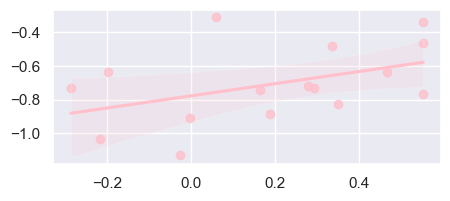

In [22]:
#f, ax = plt.subplots(figsize=(7, 7))
su_array = np.array(plot_df["Su/σ'v"])
ocr_array = np.array(plot_df["OCR"])

ax = sns.regplot(y=np.log10(su_array), x=np.log10(ocr_array), color="pink")
# get equation of line
slope, intercept, r, p, sterr = scipy.stats.linregress(x=np.log10(ocr_array),
                                                       y=np.log10(su_array))
print(round(slope, 2), round(intercept, 2))
#print(10**(slope), 10**(intercept))

In [20]:
print(p, r, sterr)
deg_f = len(su_array) - 2
t_crit = stats.t.ppf(1 - 0.025, deg_f)
m_ci = (slope - t_crit * sterr, slope + t_crit * sterr)
mean_x = np.mean(ocr_array)
intercept_std_err = sterr * np.sqrt(1/len(su_array) + mean_x*2 / np.sum((ocr_array - mean_x)**2))
intercept_ci = (intercept - t_crit * intercept_std_err, intercept + t_crit * intercept_std_err)
print(m_ci)
print(intercept_ci)

0.00014250749839063236 0.5920688452173168 0.15713273723392415
(0.3538056654851116, 0.9924699504405239)
(-0.9425948122616358, -0.7174458244822669)


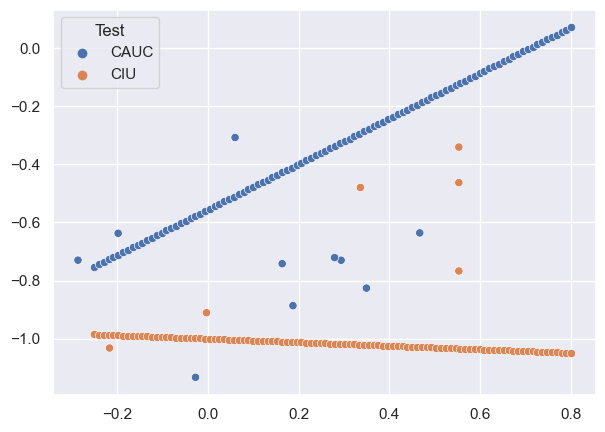

In [194]:
# y = S * x^m
linex = np.linspace(-.25, 0.8, num=100)
liney = intercept_ci[1] + m_ci[1]*linex
liney2 = intercept_ci[0] + m_ci[0]*linex
#liney = -1.91 + linex*0.67

ax = sns.scatterplot(x=linex, y=liney)
ax = sns.scatterplot(x=linex, y=liney2)
ax = sns.scatterplot(y=np.log10(su_array), x=np.log10(ocr_array), hue=plot_df["Test"])

## Index properties

In [211]:
df["FC"].describe()

count    36.000000
mean     58.461111
std      26.623065
min      20.600000
25%      36.475000
50%      53.800000
75%      79.725000
max      98.000000
Name: FC, dtype: float64